# Impact of non-Markovian environments on quantum algorithm performance

<center> 
Noah Stevenson, Keshav Kapoor, Matthew Worden, Noah Zisser, Dhruv Muley <br>
    <i> Department of Physics, University of California, Berkeley </i>
    <br><br>
    Final project for Physics C191, Spring 2019 <br>
    due 15 May 2019 at 11:59
    

### Introduction

All coherent quantum systems interact with their environment, and are well known to decohere through Markovian dissipation processes that are modeled with a Limbladian operator. In this memoryless process, information flows irreversibly from the system to the environment. However, some physical systems exhibit a correlation time between the qubit and the environment, such as when the noise spectrum of the surrounding environment is narrow, as opposed to a broad, white noise spectrum, or when the system couples to transient radiation fields. In this case, the system can experience a resurgence in coherence from information backflow from the environment (also commonly referred to as the bath) to the system after finite times. <br>
The stochastic wavefunction method is often used to model the time-evolution of open quantum systems, while the quantum circuit model is often used to model the transformation of the density matrices under discrete quantum transforamtions. For our final project, we use the quantum circuit model to simulate persistent-bath non-Markovian interactions between <i> system qubits </i> on which quantum algorithms were being performed and <i> environment qubits </i>. This configuration has many analogues to physical systems; the one that is focused on here is an ensemble of point defects whose electromagnetic field, originating from the binary orientation of the spins, each Stark shifts the frequency of each system flux-qubit via a ZZ-interaction, resulting in phase accumulation. The bath point defenct qubits occur unintentionally in the material of the superconducting circuit or the Josephson junctions that compose the system flux qubit, or the substrate on which the latter rests. The bath qubits exchange population between themselves and are governed by a XX+YY Hamiltonian, meaning the system-bath and bath-bath dynamics don't commute. 


<img src="figures/fig0.png" alt="Drawing" style="width: 700px;"/>

We model the non-Markovian persistent bath as a coherent ensemble of qubits that do not decay, and are a closed system themselves when viewed from outside of the environment. This means that quantum coherent information is transfered from the system to the bath via the ZZ interaction and distributed between the bath qubits via the XX+YY interaction. The noise that the system experiences at a later time will contain quantum coherent information of it's state at an earlier time, thus meeting the non-Markovian condition for a persistent-bath. The Markovian bath, on the other hand, loses information via dissipation to other bath elements such that the system information thermalizes to such a high number of elements that the information content in any of the point defect states is negligible.

### Cirq

The classical simulation package used is Google's Cirq. Access the terminal or command line to check that it is installed before importing it.

In [13]:
!pip install cirq

In [7]:
import cirq
print(cirq.google.Foxtail)  # prints a test qubit graph to check that cirq is working

(0, 0)───(0, 1)───(0, 2)───(0, 3)───(0, 4)───(0, 5)───(0, 6)───(0, 7)───(0, 8)───(0, 9)───(0, 10)
│        │        │        │        │        │        │        │        │        │        │
│        │        │        │        │        │        │        │        │        │        │
(1, 0)───(1, 1)───(1, 2)───(1, 3)───(1, 4)───(1, 5)───(1, 6)───(1, 7)───(1, 8)───(1, 9)───(1, 10)


From the Cirq developers: <br>
<i> "Be aware that Cirq is still alpha software, meaning we are still making breaking changes all the time. If you don't want your project to suddenly go from working to not working when we release a new version, you should depend on a specific version of Cirq and periodically bump that version to the latest one." </i> <br><br>
We follow their advice and use <b> Cirq 0.5.0 </b> for this project.

In [14]:
print(cirq.__version__)

0.5.0


### Grover's algorithm

We use the Boolean Grover's instead of the Phase Grover's

### Simulation structure

We take advantage of the modularity of object-oriented programming in Python for the spine of our simulation structure, which doesn't lend itself to Jupyter notebooks. Nonetheless, this section briefly sketches out the backend used for the simulations. The compilation and simulation of the algorithm on the system and bath qubits takes place in the method <tt>main_oqs </tt> of the class <tt> Grovers </tt> in <tt> grovers_flux_qubit.py </tt> 

Let us walk through this method to see how the simulation is structured. First, the arguments of the method are assigned to the class attributes. <br><br>

<tt>self.target = target</tt> : The target integer that Grover's algorithm searches for. <br>
<tt>self.n_computation_qubits = n_computation_qubits</tt> : The number of computation qubits to use, not including the ancilla qubit.  <br>
<tt>self.n_bath_qubits = n_bath_qubits</tt> : The number of bath qubits. <br>
<tt>self.n_iterations = n_iterations</tt> : The number of times the oracle-diffusion step of Grover's algorithm is repeated before measurement. <br>
<tt>self.n_simulations = n_simulations</tt> : The number of times the circuit defined by the number of qubits, the number of iteration, and the target integer, is run. <br>
<tt>self.bath_type = bath_type</tt> : Defines whether the bath is <tt> 'Markovian'</tt> or <tt> 'non-Markovian'. </tt> <br>  <tt>self.prob_ground = prob_ground </tt> : The manual input of the probability that, after initialization, a qubit is found in the ground state. This is relevant for the initial initialization of the non-Markovian bath, and for setting the state of the qubit after decay causes population loss for the Markovian bath. The outcome for the partition function for a certain temperature and superconducting qubit state frequencies are calculated in <tt> partition_function.nb </tt> and inputted manually.  <br> 


The qubits are defined with the method <tt> set_io_qubits </tt> just before the Cirq simulator is defined.

Then, for each time the simulation is repeated (<tt> n_simulations </tt>), Grover's circuit is compiled, run once, and <tt> counter </tt> increased by one if the measurement outcome matches the target. The heart of the simulation is in <tt> make_grovers_circuit_oqs </tt>

The system-bath and bath-bath interactions are defined in <tt> grovers_step_oqs </tt> as taking place before the oracle and diffusion operators. 

The way the interactions described earlier are implemented can be seen if we look at <tt> bath_append </tt>: 

The method calls to a dictionary that holds the coupling strength for each coupling type, located in <tt> coupling_dict.py </tt> and then creates the unitaries that represent the system-bath and bath-bath couplings by calling to the models in <tt>gates.py </tt>. The appropriate unitaries are then appended to the circuit for each qubit.

<b> coupling_dict.py

<b> gates.py

This gives us the ability to work with the files <tt> coupling_dict.py </tt> and <tt> gates.py </tt> without having to touch the actual backend of the simulation. For the coupling strength, this amounts to changing $\theta$, which is shown as $\phi$ below

<img src="figures/xx.png" style="width: 300px;"><img src="figures/yy.png" style="width: 375px;"><img src="figures/zz.png" style="width: 300px;">

### Simple comparisons of the performance of Grover's algorithm in the presence of Markovian and non-Markovian bath

Here we show how parameter sweeps can be implemented to gain insight to how different types of non-Markovian environments impact Grover's algorithm. First we start by adding the module directory to the local path.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

We can define any parameter sweep using the simulation modules. Here we define a sweep over the number of iterations, illustrating the divergence of the performance of Grover's algorithm in the case of a Markovian and non-Markovian bath

In [2]:
import grovers_flux_qubit
import numpy as np
import pickle
from datetime import datetime
import matplotlib.pyplot as plt
import time

def sweep_iterations(max_iterations=10,
                     n_computational_qubits=2,
                     n_bath_qubits=2,
                     target=0,
                     n_simulations=50,
                     prob_ground=0.821662,
                     savedir=None,
                     savename=None,
                     print_runtime=False,
                     data_dict_return=False,
                     run_simulation=True,
                     print_circuit=False,
                     c_start=None,
                     c_end=None
                    ):
    

    _start_tot_ = time.time()
    grovers = grovers_flux_qubit.Grovers()

    # path for saving file
    if savename: filename = savename+'-{0}'.format(datetime.today().strftime('%Y%m%d_%H%M%S'))

    # dictionary to store data
    data_dict = {
        'platform': 'Cirq',
        'simulation-structure': 'flux qubit',
        'Markovian': {'data': np.empty(max_iterations)},
        'non-Markovian': {'data': np.empty(max_iterations)},
        'n_computational_qubits': n_computational_qubits,
        'n_bath_qubits': n_bath_qubits,
        'target': target,
        'n_simulations': n_simulations,
        'prob_ground': prob_ground,
        'max_iterations': max_iterations,
    }
    
    # Printing a sample quantum circuit
    if print_circuit:
        for _bath_type_ in ['Markovian', 'non-Markovian']:
            print(2*'\n'+_bath_type_+' bath circuit:')
            grovers.main_oqs(n_computation_qubits=n_computational_qubits,
                                                                  n_bath_qubits=n_bath_qubits,
                                                                  target=target,
                                                                  n_iterations=max_iterations,
                                                                  bath_type=_bath_type_,
                                                                  amplitude_damping_constant=1,
                                                                  n_simulations=n_simulations,
                                                                  prob_ground=prob_ground,
                                                                  print_circuit=True,
                                                                  run_simulation=False,
                            c_start=c_start,
                            c_end=c_end)
    if run_simulation is False:
        raise SystemExit('run_simulation is False')
        
    # iterate through the number of iterations of grover's algorithm
    for i in np.arange(max_iterations)+1:
        _start_ = time.time()
        if print_runtime: print(f'{i} iterations of Grover\'s algorithm')

        # Markovian
        _bath_type_ = 'Markovian'
        data_dict[_bath_type_]['data'][i-1] = grovers.main_oqs(n_computation_qubits=n_computational_qubits,
                                                                  n_bath_qubits=n_bath_qubits,
                                                                  target=target,
                                                                  n_iterations=i,
                                                                  bath_type=_bath_type_,
                                                                  amplitude_damping_constant=1,
                                                                  n_simulations=n_simulations,
                                                                  prob_ground=prob_ground)

        # non-Markovian
        _bath_type_ = 'non-Markovian'
        data_dict[_bath_type_]['data'][i-1] = grovers.main_oqs(n_computation_qubits=n_computational_qubits,
                                                                  n_bath_qubits=n_bath_qubits,
                                                                  target=target,
                                                                  n_iterations=i,
                                                                  bath_type=_bath_type_,
                                                                  amplitude_damping_constant=1,
                                                                  n_simulations=n_simulations,
                                                                  prob_ground=prob_ground)
        
        _end_ = time.time()
        _runtime_minutes_ = str((_end_-_start_)/60.)[:5]
        if print_runtime: print(f'completed in {_runtime_minutes_} minutes \n\n')

    # record total runtime
    _end_tot_ = time.time()
    _tot_runtime_minutes_ = str((_end_tot_ - _start_tot_) / 60.)[:5]
    if print_runtime: print(f'\n Total runtime: {_tot_runtime_minutes_} minutes \n\n')
    data_dict['Total runtime'] = f'{_tot_runtime_minutes_} minutes'

    # record medians, means, std
    data_dict['Markovian']['median'] = np.median(data_dict['Markovian']['data'], axis=0)
    data_dict['Markovian']['mean'] = np.mean(data_dict['Markovian']['data'], axis=0)
    data_dict['Markovian']['std'] = np.std(data_dict['Markovian']['data'], axis=0)

    data_dict['non-Markovian']['median'] = np.median(data_dict['non-Markovian']['data'], axis=0)
    data_dict['non-Markovian']['mean'] = np.mean(data_dict['non-Markovian']['data'], axis=0)
    data_dict['non-Markovian']['std'] = np.std(data_dict['non-Markovian']['data'], axis=0)


    # save the data with Pickle
    if savedir is not None and savename is not None: pickle.dump(data_dict, open(savedir+filename+'.pickle', "wb"))

    # plot the results
    plt.figure(figsize=(8, 8))
    ax = plt.axes()

    colors = {'Markovian': {'facecolor': '#7BAFD4', 'edgecolor': '#00356B'},
              'non-Markovian': {'facecolor': '#CD5C5C', 'edgecolor': '#800000'}
              }

    for _key_ in colors:
        ax.plot(np.arange(max_iterations)+1, data_dict[_key_]['data'],
                ls='-', lw=2, alpha=0.5, marker='o', markersize=5, color=colors[_key_]['edgecolor'],
                label=_key_)

    fontsize = 12
    ax.set_ylabel(r"Probability of measuring correct outcome $(P)$", fontsize=fontsize)
    ax.set_xlabel(r"Iternations of Grover's algorithm $(n)$", fontsize=fontsize)

    plt.legend()
    if savedir is not None and filename is not None: plt.savefig(savedir+filename+'.png')
    
    if data_dict_return: return data_dict

First, we check that a base case of two system qubits and no bath is identical to what we expect. 

In [3]:
sweep_iterations(max_iterations=1,
                 n_computational_qubits=2,
                 n_bath_qubits=0,
                 target=0,
                 n_simulations=40,
                 prob_ground=0.821662,
                 print_runtime=False,
                 print_circuit=True,
                 run_simulation=False)



Markovian bath circuit:
(0, 0): ───H───X───@───X───H───X───@───X───H───M('result')───
                   │               │           │
(1, 0): ───H───X───@───X───H───X───Z───X───H───M─────────────
                   │
(2, 0): ───X───H───X───H─────────────────────────────────────


non-Markovian bath circuit:
(0, 0): ───H───X───@───X───H───X───@───X───H───M('result')───
                   │               │           │
(1, 0): ───H───X───@───X───H───X───Z───X───H───M─────────────
                   │
(2, 0): ───X───H───X───H─────────────────────────────────────


SystemExit: run_simulation is False

C:\Python37\lib\site-packages\IPython\core\interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Simulating the circuit, we obtain the base case against which we can compare our other simulations

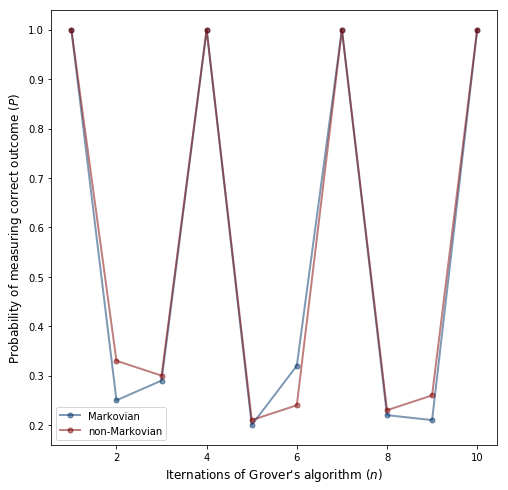

In [15]:
sweep_iterations(max_iterations=10,
                 n_computational_qubits=2,
                 n_bath_qubits=0,
                 target=0,
                 n_simulations=100,
                 prob_ground=0.821662,
                 print_runtime=False,
                 print_circuit=False,
                 run_simulation=True)

Introducing a single bath qubit, we see ZZ interactions between each system qubit and the bath qubit, noting that the amplitude dampening gate <tt> AD(1) </tt> only appears on the bath qubit in the Markovian circuit, as expected. The float in parentheses attached to each ZZ gate is the angle $\theta$, or $\phi$ as it is shown in an earlier part of the notebook

<img src="figures/2system1bath.png" alt="Drawing" style="width: 250px;"/>

In [6]:
sweep_iterations(max_iterations=1,
                 n_computational_qubits=2,
                 n_bath_qubits=1,
                 target=0,
                 n_simulations=40,
                 prob_ground=0.821662,
                 print_runtime=False,
                 print_circuit=True,
                 run_simulation=False)



Markovian bath circuit:
               ┌──────────┐
(0, 0): ───H─────ZZ(0.078)────X───────────────────────@───X───ZZ(0.078)───H───────────X───────────────@───X───H───M('result')───
                 │                                    │       │                                       │           │
(1, 0): ───H─────┼────────────ZZ(0.078)───X───────────@───X───┼───────────ZZ(0.078)───H───────────X───Z───X───H───M─────────────
                 │            │                       │       │           │
(2, 0): ───X────H┼────────────┼───────────ZZ(0.078)───X───────┼───────────┼───────────ZZ(0.078)───H─────────────────────────────
                 │            │           │                   │           │           │
(3, 0): ─────────ZZ(0.078)────ZZ(0.078)───ZZ(0.078)───────────ZZ(0.078)───ZZ(0.078)───ZZ(0.078)───────────────────AD(1)─────────
               └──────────┘


non-Markovian bath circuit:
               ┌──────────┐
(0, 0): ───H─────ZZ(0.078)────X───────────────────────@───X───ZZ

SystemExit: run_simulation is False

Simulating the circuit, we observe that the probability of measuring the bitstring corresponding to the binary rappresentation of the target integer in the presence of a non-Markovian bath exceeds that of Grover's algorithm with a Markovian bath at all number of iterations, suggesting that memory is stored in and re-introduced by the bath with non-negligible coherence.  

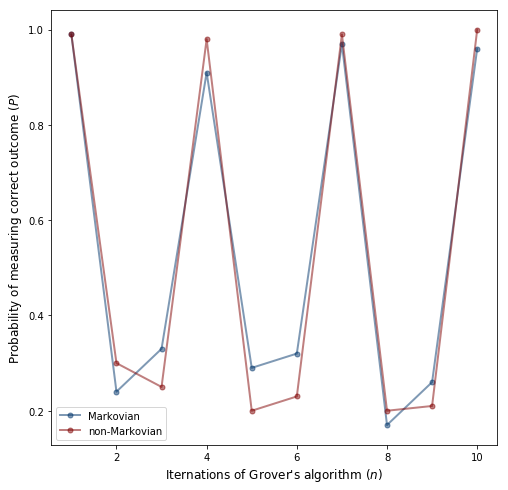

In [16]:
sweep_iterations(max_iterations=10,
                 n_computational_qubits=2,
                 n_bath_qubits=1,
                 target=0,
                 n_simulations=100,
                 prob_ground=0.821662,
                 print_runtime=False,
                 print_circuit=False,
                 run_simulation=True)

To visualize what the bath-bath coupling looks like in our quantum circuit, we introduce another bath qubit and establish the connectivity graph shown below. 

<img src="figures/2system2bath.png" alt="Drawing" style="width: 250px;"/>

In [21]:
sweep_iterations(max_iterations=1,
                 n_computational_qubits=2,
                 n_bath_qubits=2,
                 target=0,
                 n_simulations=40,
                 prob_ground=0.821662,
                 print_runtime=False,
                 print_circuit=True,
                 run_simulation=False,
                c_start=0,
                c_end=10)



Markovian bath circuit:
               ┌──────────┐
(0, 0): ───H─────ZZ(0.078)────────────────────────────────────ZZ(0.078)───X───────────────────────@───────X───
                 │                                            │                                   │
(1, 0): ───H─────┼────────────ZZ(0.078)───────────────────────┼───────────ZZ(0.078)───X───────────@───────X───
                 │            │                               │           │                       │
(2, 0): ───X────H┼────────────┼───────────ZZ(0.078)───────────┼───────────┼───────────ZZ(0.078)───X───────────
                 │            │           │                   │           │           │
(3, 0): ─────────ZZ(0.078)────ZZ(0.078)───ZZ(0.078)───XX_YY───┼───────────┼───────────┼───────────XX_YY───────
                                                      │       │           │           │           │
(4, 0): ──────────────────────────────────────────────XX_YY───ZZ(0.078)───ZZ(0.078)───ZZ(0.078)───XX_YY───────
   

SystemExit: run_simulation is False

When simulating a two-qubit bath, we obtain results that differ from simulations where the number of bath qubits N is N $\neq$0 $\forall$ N; The Markovian case outperforms the non-Markovian case by a significant margin. It unclear to us why this is the case for this specific number of bath qubits. For $N \in \{3,4,5\}$, and presumably at higher $N$, the non-Markovian case consistenly and exclusively either matches the performance of the Markovian case for one iteration of Grover's algorithm, or exceeds it to within the resolution imposed on us by our small sample size (<tt> n_simulations </tt>). To demonstrate this we plot the simulation results for $N=3$.

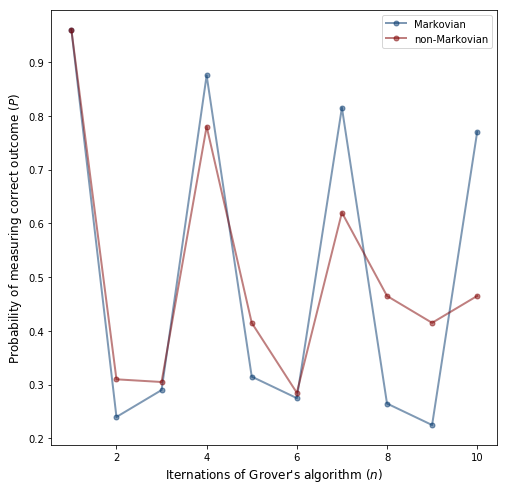

In [20]:
sweep_iterations(max_iterations=10,
                 n_computational_qubits=2,
                 n_bath_qubits=2,
                 target=0,
                 n_simulations=200,
                 prob_ground=0.821662,
                 print_runtime=False,
                 print_circuit=False,
                 run_simulation=True)

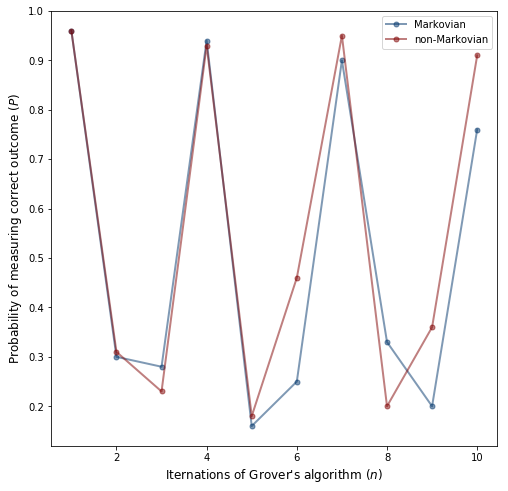

In [18]:
sweep_iterations(max_iterations=10,
                 n_computational_qubits=2,
                 n_bath_qubits=3,
                 target=0,
                 n_simulations=100,
                 prob_ground=0.821662,
                 print_runtime=False,
                 print_circuit=False,
                 run_simulation=True)

### Remarks

Here we turn only one knob, the number of bath qubits, but the simulation package we developed easily allows for functions like <tt> sweep_iterations </tt> to be written for many parameters, such as system qubit size, coupling strength, temperatures, qubit frequencies, etc. By introducing qubit-pair-specific coupling strengths, more complex connectivity graphs are also possible. Although it is not cleanly implemented at the moment, by changing the <tt> bath_append </tt> function in the <tt> Grovers </tt> class, different types of couplings are realizable.  